In [1]:
import pandas as pd
import numpy as np
import ast


# Visalization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import EDA

EDA lib ready


In [3]:
credits = pd.read_csv(r'..\data\the-movies-dataset\credits.csv')
credits.head(1)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862


In [4]:
# for gender value fixing and file saving
dfnu = pd.read_csv(r'..\data\the-movies-dataset\ready_dfs\dfnu_ready.csv')

In [5]:
EDA.general_info(credits)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None

Index(['cast', 'crew', 'id'], dtype='object')

(45476, 3)

-Presence of NaNs in df-
cast    False
crew    False
id      False
dtype: bool


In [21]:
EDA.general_info(dfnu)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64848 entries, 0 to 64847
Data columns (total 3 columns):
Unnamed: 0    64848 non-null int64
name          64848 non-null object
gender        64848 non-null object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB
None

Index(['Unnamed: 0', 'name', 'gender'], dtype='object')

(64848, 3)

-Presence of NaNs in df-
Unnamed: 0    False
name          False
gender        False
dtype: bool


In [5]:
cast = pd.DataFrame(credits[['id', 'cast']])
crew = pd.DataFrame(credits[['id', 'crew']])

## Cast

In [6]:
cast = EDA.credits_cleaner(cast, 'cast', ['cast_order', 'cast_name', 'cast_gender'], ['order', 'name', 'gender'])
cast.head(2)

Working on cast_order with order as filter...

cast_order done.

Working on cast_name with name as filter...

cast_name done.

Working on cast_gender with gender as filter...

cast_gender done.



,id,cast,cast_size,cast_order,cast_name,cast_gender
0,862,"[{'cast_id': 14, 'character': 'Woody (voice)',...",13,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2]"
1,8844,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",26,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, ..."


In [83]:
EDA.general_info(cast)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 5 columns):
id            45476 non-null int64
cast          45476 non-null object
cast_size     45476 non-null object
cast_order    45476 non-null object
cast_name     45476 non-null object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None

Index(['id', 'cast', 'cast_size', 'cast_order', 'cast_name'], dtype='object')

(45476, 5)

-Presence of NaNs in df-
id            False
cast          False
cast_size     False
cast_order    False
cast_name     False
dtype: bool


In [25]:
actors = EDA.actor_separator(cast, ['id', 'cast_order', 'cast_name', 'cast_gender'])
actors

,id,cast_order,cast_name,cast_gender
0,862,0,Tom Hanks,2
1,862,1,Tim Allen,2
2,862,2,Don Rickles,2
3,862,3,Jim Varney,2
4,862,4,Wallace Shawn,2
...,...,...,...,...
562469,227506,0,Iwan Mosschuchin,2
562470,227506,1,Nathalie Lissenko,1
562471,227506,2,Pavel Pavlov,2
562472,227506,3,Aleksandr Chabrov,0


In [26]:
actors['cast_name'].value_counts().head(10)

Bess Flowers         241
Christopher Lee      148
John Wayne           125
Samuel L. Jackson    123
Gérard Depardieu     110
Michael Caine        110
John Carradine       109
Donald Sutherland    109
Jackie Chan          108
Frank Welker         107
Name: cast_name, dtype: int64

The 10 most prolific actors in this dataset. It must be noted that most of the entries correspond with classic actors; therefore it is difficult to try to establish some kind of popularity measure, as most of these actors are dead.

In [32]:
actors['cast_gender'] = actors['cast_gender'].apply(EDA.gender)

In [30]:
genders = actors['cast_gender'].value_counts()
genders

Male      226713
0         223964
Female    111797
Name: cast_gender, dtype: int64

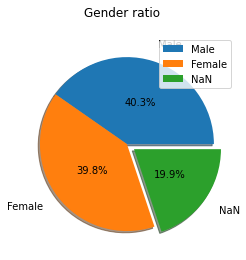

In [31]:
labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

# Plotting graph
plt.pie(genders,  autopct='%1.1f%%', startangle=0, explode= explode, labels= labels, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(labels, loc= 'best')
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

In order to resolve the NaN problem, it was thought that a solution involving the gender asotiation around names was a quick and easy one. As any names has a certain gender assigned to it. For that pourpose a function was developed (gender_search) and a new df created: dfnu (DataFrame Names Unique).

Sadly, it has been realised that a large portion of the NaN values correspond with "foreing" actors and actresses. Foreign not in the sense of nationality, but language, as is understood in the "metadata" csv.

Knowing that dfnu contains a majority of english names of both genders (as it originates from the scottish National Records), it will be used to determine the number of english and none-english names. Nontheless other databases from other nationalities have also been used.

In [162]:
EDA.gender_search(actors, dfnu, 'cast_name', 'cast_gender')
genders2 = actors['cast_gender'].value_counts()
genders2

Male      350492
Female    169580
0          42402
Name: cast_gender, dtype: int64

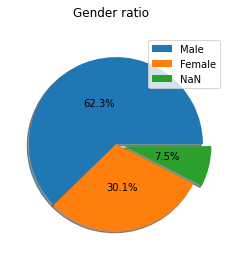

In [163]:
labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

# Plotting graph
plt.pie(genders2,  autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(labels, loc= 'best')
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

As the grahp shows, the NaN values have been reduced by more than half. The 7.5% of latter data is explained by the presence of not latin-based alphabets, uncomon names and nationalities not represented in dfnu because of the dificulty into securing the relevant data.

Since the NaN data has been drasticly reduced, the rest of the NaN values will be deleted.

In [164]:
actors = actors.replace(0, np.nan).dropna()

In [166]:
genders3 = actors['cast_gender'].value_counts()
genders3

Male      325262
Female    159587
Name: cast_gender, dtype: int64

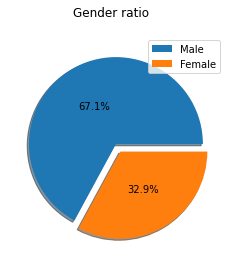

In [168]:
labels = 'Male', 'Female'
explode = 0, 0.1

# Plotting graph
plt.pie(genders3,  autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
plt.suptitle('Gender ratio', fontsize=12)

# Legend and titles
plt.legend(labels, loc= 'best')
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

In [169]:
actors.id = actors.id.astype(str)

In [22]:
df_save(actors)

## Credits

In [175]:
crew['crew'] = crew['crew'].apply(ast.literal_eval)
crew['crew_len'] = crew['crew'].apply(lambda x: len(x))

# Creation of new columns
EDA.crew_cleaner(crew, 'director', 'Directing', ['name', 'gender'])
EDA.crew_cleaner(crew, 'producer', 'Production', ['name', 'gender'])
EDA.crew_cleaner(crew, 'writer', 'Writing', ['name', 'gender'])

In [187]:
crew.head()

,id,crew,crew_len,director_name,director_gender,producer_name,producer_gender,writer_name,writer_gender
0,862,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",106,"[John Lasseter, Roman Figun, Desirée Mourad]","[2, 0, 0]","[Bonnie Arnold, Ed Catmull, Ralph Guggenheim, ...","[1, 0, 2, 2, 0, 0, 0, 1, 0]","[Joss Whedon, Andrew Stanton, Joel Cohen, Alec...","[2, 2, 2, 0, 2, 2, 0, 2]"
1,8844,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",16,[Joe Johnston],[2],"[Larry J. Franco, Nancy Foy, Scott Kroopf, Ted...","[2, 0, 2, 2, 2, 2]","[Jonathan Hensleigh, Chris van Allsburg, Greg ...","[2, 2, 2, 2]"
2,15602,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",4,[Howard Deutch],[2],[],[],"[Mark Steven Johnson, Mark Steven Johnson]","[2, 2]"
3,31357,"[{'credit_id': '52fe44779251416c91011acb', 'de...",10,[Forest Whitaker],[2],"[Ronald Bass, Ezra Swerdlow, Deborah Schindler...","[0, 2, 1, 0, 0]","[Ronald Bass, Terry McMillan, Terry McMillan]","[0, 0, 0]"
4,11862,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",7,[Charles Shyer],[2],[Nancy Meyers],[1],"[Nancy Meyers, Albert Hackett]","[1, 2]"


In [188]:
EDA.general_info(crew)

-dtype, length and name of columns-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 9 columns):
id                 45476 non-null int64
crew               45476 non-null object
crew_len           45476 non-null int64
director_name      45476 non-null object
director_gender    45476 non-null object
producer_name      45476 non-null object
producer_gender    45476 non-null object
writer_name        45476 non-null object
writer_gender      45476 non-null object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB
None

Index(['id', 'crew', 'crew_len', 'director_name', 'director_gender',
       'producer_name', 'producer_gender', 'writer_name', 'writer_gender'],
      dtype='object')

(45476, 9)

-Presence of NaNs in df-
id                 False
crew               False
crew_len           False
director_name      False
director_gender    False
producer_name      False
producer_gender    False
writer_name        False
writer_gender      False
dty

In [204]:
def personnel_separator (df, col_list):
    """
                        ---What it does---
    Creates a new df_new object using a list of 4 columns from another df object. Use these function when the cells of the original df are in       list format.
                        ---What it needs---
    A df object (df)
    A list of 4 columns from the df (col_list). These MUST correspond with those of the df.
                        ---What it returns---
    A new df object (df_new)
    """

    value_1_col = []
    value_2_col = [] 
    value_3_col = []

    
    for e in range(df.shape[0]):
        for i in range(len(df.loc[e, col_list[1]])):
            value_1 = df.loc[e, col_list[0]]
            value_1_col.append(value_1)

            value_2 = df.loc[e, col_list[1]][i]
            value_2_col.append(value_2)
            
            value_3 = df.loc[e, col_list[2]][i]
            value_3_col.append(value_3)
            
    df_new = pd.DataFrame({col_list[0] : value_1_col, col_list[1] : value_2_col, col_list[2] : value_3_col})
    return df_new

In [206]:
directors = personnel_separator(crew, ['id', 'director_name', 'director_gender'])
directors.head(6)

,id,director_name,director_gender
0,862,John Lasseter,2
1,862,Roman Figun,0
2,862,Desirée Mourad,0
3,8844,Joe Johnston,2
4,15602,Howard Deutch,2
5,31357,Forest Whitaker,2


In [208]:
producers = personnel_separator(crew, ['id', 'producer_name', 'producer_gender'])
producers.head(6)

,id,producer_name,producer_gender
0,862,Bonnie Arnold,1
1,862,Ed Catmull,0
2,862,Ralph Guggenheim,2
3,862,Steve Jobs,2
4,862,Karen Robert Jackson,0
5,862,Lori Lombardo,0


In [209]:
writers = personnel_separator(crew, ['id', 'writer_name', 'writer_gender'])
writers.head(6)

,id,writer_name,writer_gender
0,862,Joss Whedon,2
1,862,Andrew Stanton,2
2,862,Joel Cohen,2
3,862,Alec Sokolow,0
4,862,John Lasseter,2
5,862,Pete Docter,2


In [213]:
directors['director_gender'] = directors['director_gender'].apply(EDA.gender)
producers['producer_gender'] = producers['producer_gender'].apply(EDA.gender)
writers['writer_gender'] = writers['writer_gender'].apply(EDA.gender)

In [214]:
dir_gend_count = directors['director_gender'].value_counts()
pro_gend_count = producers['producer_gender'].value_counts()
wri_gend_count = writers['writer_gender'].value_counts()
print(f'Directors:\n{dir_gend_count}\n\nProducers:\n{pro_gend_count}\n\nWriters:\n{wri_gend_count}')

Directors:
Male      28704
0         26234
Female     3196
Name: director_gender, dtype: int64

Producers:
0         47845
Male      34207
Female    12446
Name: producer_gender, dtype: int64

Writers:
0         38431
Male      32864
Female     3536
Name: writer_gender, dtype: int64


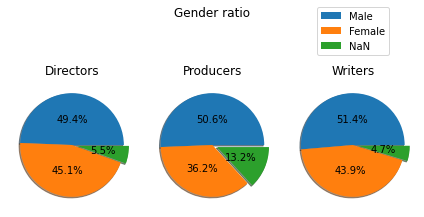

In [236]:
data1 = dir_gend_count
data2 = pro_gend_count
data3 = wri_gend_count

labels = 'Male', 'Female', 'NaN'
explode = 0, 0, 0.1

# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)



# plot each pie chart in a separate subplot
ax1.pie(data1, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
ax2.pie(data2, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
ax3.pie(data3, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)


# Legend and titles
plt.legend(labels, bbox_to_anchor=(0.5,1.60), loc= 'upper center')
plt.suptitle('Gender ratio', fontsize=12)
ax1.set_title("Directors", loc='center', y=1)
ax2.set_title("Producers", loc='center', y=1)
ax3.set_title("Writers", loc='center', y=1)

plt.tight_layout()
plt.show()

The number of NaN values is much higher than expected. NaN values have been observed in both genders. In order to continue with the clean-up process, the "gender_search" function is deployed.

In [239]:
EDA.gender_search(producers, dfnu, 'producer_name', 'producer_gender')
EDA.gender_search(directors, dfnu, 'director_name', 'director_gender')
EDA.gender_search(writers, dfnu, 'writer_name', 'writer_gender')
print('Done')

Done


In [243]:
directors['director_gender'] = directors['director_gender'].replace(0, np.nan).dropna()
producers['producer_gender'] = producers['producer_gender'].replace(0, np.nan).dropna()
writers['writer_gender'] = writers['writer_gender'].replace(0, np.nan).dropna()

In [247]:
dir_gend_count2 = directors['director_gender'].value_counts()
pro_gend_count2 = producers['producer_gender'].value_counts()
wri_gend_count2 = writers['writer_gender'].value_counts()
print(f'Directors:\n{dir_gend_count2}\n\nProducers:\n{pro_gend_count2}\n\nWriters:\n{wri_gend_count2}')

Directors:
Male      45565
Female     7813
Name: director_gender, dtype: int64

Producers:
Male      63961
Female    23472
Name: producer_gender, dtype: int64

Writers:
Male      58691
Female     8822
Name: writer_gender, dtype: int64


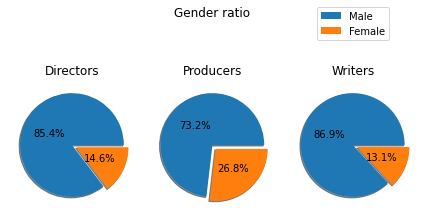

In [246]:
data1 = dir_gend_count2
data2 = pro_gend_count2
data3 = wri_gend_count2

labels = 'Male', 'Female'
explode = 0, 0.1

# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)



# plot each pie chart in a separate subplot
ax1.pie(data1, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
ax2.pie(data2, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)
ax3.pie(data3, autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5, labeldistance = 1.2)


# Legend and titles
plt.legend(labels, bbox_to_anchor=(0.5,1.60), loc= 'upper center')
plt.suptitle('Gender ratio', fontsize=12)
ax1.set_title("Directors", loc='center', y=1)
ax2.set_title("Producers", loc='center', y=1)
ax3.set_title("Writers", loc='center', y=1)

plt.tight_layout()
plt.show()

In [39]:
directors.id = actors.id.astype(str)
producers.id = actors.id.astype(str)

In [40]:
df_save(producers)
df_save(directors)